## Worksheet 02
***

### Data preparation

In [1]:
from sklearn.datasets import load_digits
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
import numpy.testing as nt

import pandas as pd
from IPython.display import display

from utils import (euclidean_distance, euclidean_norm, fade_zeros)
from viz import (plot_data, plot_error_rate)
from knn_classifier import (knn_classifier, compute_confusion_matrix, calculate_error_knn_classifier)

import KFoldCV

%load_ext autoreload
%autoreload 2

In [2]:
digits = load_digits()

In [3]:
print(digits.keys())

data = digits['data']
images = digits['images']
target = digits['target']
target_names = digits['target_names']

print(digits['DESCR'], '\n')
print("-------- DATA DESCRIPTION--------")
print(f"data.shape         = {data.shape}")
print(f"data.dtype         = {data.dtype}")
print(f"images.shape       = {images.shape}")
print(f"images.dtype       = {images.dtype}")
print(f"target.shape       = {target.shape}")
print(f"target.dtype       = {target.dtype}")
print(f"target_names.shape = {target_names.shape}")
print(f"target_names.dtype = {target_names.dtype}")
print(f"target[:20]        = {target[:20]}")

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping 

The digits dataset consists of 8x8 pixel images of digits. The ``images`` attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 10 images. The ``target`` attribute of the dataset stores the digit each image represents and this is included in the title of the 10 plots below.

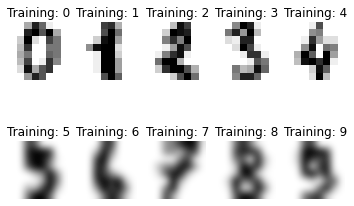

In [4]:
# Plot images from 0 to 9
plot_data(images, target)


For scientific analysis, it's important that we can see the exact value of each pixel in an image array,  even if ``interpolation = 'bicubic'`` often yields visually more pleasing results.

In [5]:
# Split of training and test data using sklearn
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    digits.data,
    digits.target,
    test_size=0.4,
    random_state=0
)

print(f"X_train.shape = {X_train.shape}")
print(f"X_test.shape  = {X_test.shape}")
print(f"y_train.shape = {y_train.shape}")
print(f"y_test.shape  = {y_test.shape}")
print(f"y_test[:10]   = {y_test[:10]}")

X_train.shape = (1078, 64)
X_test.shape  = (719, 64)
y_train.shape = (1078,)
y_test.shape  = (719,)
y_test[:10]   = [2 8 2 6 6 7 1 9 8 5]


In [6]:
%timeit dist_loop = euclidean_distance(X_train, X_test, loop=True)
dist_loop = euclidean_distance(X_train, X_test, loop=True)

5.83 s ± 321 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%timeit dist_vect = euclidean_distance(X_train, X_test)
%timeit dist = euclidean_norm(X_train, X_test)
dist_vect = euclidean_distance(X_train, X_test)
dist = euclidean_norm(X_train, X_test)

947 ms ± 7.21 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
463 ms ± 3.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
print(
    f"Loop- and vectorized-based euclidean distance give same results (within some tolerance): {np.allclose(dist_vect, dist_loop)}"
)

Loop- and vectorized-based euclidean distance give same results (within some tolerance): True


### k-Nearest Neighbor Classifier

In [9]:
predictions = knn_classifier(X_train, X_test, y_train, 7)

In [10]:
predictions.shape

(719,)

In [11]:
# Filter data
filt_X_train = X_train[np.logical_or(3 == y_train, 9 == y_train)]
filt_y_train = y_train[np.logical_or(3 == y_train, 9 == y_train)]

filt_X_test = X_test[np.logical_or(3 == y_test, 9 == y_test)]
filt_y_test = y_test[np.logical_or(3 == y_test, 9 == y_test)]

# Filtered images
img_train = filt_X_train.reshape(len(filt_X_train), 8, 8)
img_test = filt_X_test.reshape(len(filt_X_test), 8, 8)

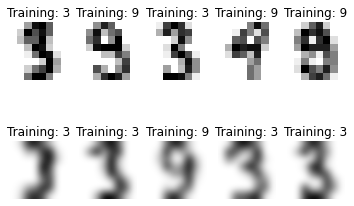

In [12]:
# Plot first 10 filtered images images
plot_data(img_train, filt_y_train)

In [13]:
# Calculate out-of-sample errors for different k values
K = [1, 3, 5, 9, 17, 33]
confusion = compute_confusion_matrix(X_train, X_test, y_train, y_test, K)

In [14]:
# Display confusion matrix for on k value as pandas.DataFrame
for i in range(len(K)):
    display(
    pd.DataFrame(data=confusion[i, :, :], index=target_names, columns=target_names)
        .rename_axis("k = " + str(K[i]), axis='columns')
        .style.apply(fade_zeros)
        .format("{0:2f}%")
    )

k = 1,0,1,2,3,4,5,6,7,8,9
0,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%
1,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,1.324503%,0.000000%
2,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%
3,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.628931%,0.000000%,0.000000%,0.675676%,1.388889%
4,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%
5,0.000000%,0.000000%,0.000000%,0.628931%,0.000000%,0.000000%,0.606061%,0.000000%,0.000000%,1.226994%
6,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.606061%,0.000000%,0.000000%,0.000000%,0.000000%
7,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%
8,0.000000%,1.324503%,0.000000%,0.675676%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.657895%
9,0.000000%,0.000000%,0.000000%,1.388889%,0.000000%,1.226994%,0.000000%,0.000000%,0.657895%,0.000000%


k = 3,0,1,2,3,4,5,6,7,8,9
0,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%
1,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,1.324503%,0.000000%
2,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.735294%,0.000000%,0.000000%
3,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.628931%,0.000000%,0.000000%,1.351351%,0.694444%
4,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.781250%,0.709220%,0.000000%
5,0.000000%,0.000000%,0.000000%,0.628931%,0.000000%,0.000000%,0.606061%,0.000000%,0.000000%,0.613497%
6,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.606061%,0.000000%,0.000000%,0.649351%,0.000000%
7,0.000000%,0.000000%,0.735294%,0.000000%,0.781250%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%
8,0.000000%,1.324503%,0.000000%,1.351351%,0.709220%,0.000000%,0.649351%,0.000000%,0.000000%,1.315789%
9,0.000000%,0.000000%,0.000000%,0.694444%,0.000000%,0.613497%,0.000000%,0.000000%,1.315789%,0.000000%


k = 5,0,1,2,3,4,5,6,7,8,9
0,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%
1,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,3.311258%,0.000000%
2,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.735294%,0.000000%,0.000000%
3,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.628931%,0.000000%,0.000000%,1.351351%,0.694444%
4,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,1.562500%,0.709220%,0.000000%
5,0.000000%,0.000000%,0.000000%,0.628931%,0.000000%,0.000000%,0.606061%,0.000000%,0.000000%,1.226994%
6,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.606061%,0.000000%,0.000000%,0.649351%,0.000000%
7,0.000000%,0.000000%,0.735294%,0.000000%,1.562500%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%
8,0.000000%,3.311258%,0.000000%,1.351351%,0.709220%,0.000000%,0.649351%,0.000000%,0.000000%,1.315789%
9,0.000000%,0.000000%,0.000000%,0.694444%,0.000000%,1.226994%,0.000000%,0.000000%,1.315789%,0.000000%


k = 9,0,1,2,3,4,5,6,7,8,9
0,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%
1,0.000000%,0.000000%,0.694444%,0.000000%,0.000000%,0.000000%,0.671141%,0.000000%,3.311258%,0.000000%
2,0.000000%,0.694444%,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.735294%,0.000000%,0.000000%
3,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.628931%,0.000000%,0.000000%,1.351351%,0.694444%
4,0.000000%,0.000000%,0.000000%,0.000000%,0.000000%,0.657895%,0.000000%,1.562500%,1.418440%,0.000000%
5,0.000000%,0.000000%,0.000000%,0.628931%,0.657895%,0.000000%,0.606061%,0.000000%,0.000000%,1.226994%
6,0.000000%,0.671141%,0.000000%,0.000000%,0.000000%,0.606061%,0.000000%,0.000000%,0.649351%,0.000000%
7,0.000000%,0.000000%,0.735294%,0.000000%,1.562500%,0.000000%,0.000000%,0.000000%,0.699301%,0.000000%
8,0.000000%,3.311258%,0.000000%,1.351351%,1.418440%,0.000000%,0.649351%,0.699301%,0.000000%,0.657895%
9,0.000000%,0.000000%,0.000000%,0.694444%,0.000000%,1.226994%,0.000000%,0.000000%,0.657895%,0.000000%


k = 17,0,1,2,3,4,5,6,7,8,9
0,0.000000%,0.000000%,0.763359%,0.000000%,0.000000%,0.000000%,0.735294%,0.000000%,0.000000%,0.000000%
1,0.000000%,0.000000%,3.472222%,0.000000%,0.735294%,0.000000%,0.671141%,0.000000%,3.973510%,0.000000%
2,0.763359%,3.472222%,0.000000%,0.709220%,0.746269%,0.000000%,0.000000%,2.205882%,2.013423%,0.000000%
3,0.000000%,0.000000%,0.709220%,0.000000%,0.000000%,0.628931%,0.000000%,1.481481%,2.027027%,0.694444%
4,0.000000%,0.735294%,0.746269%,0.000000%,0.000000%,0.657895%,0.000000%,1.562500%,1.418440%,0.000000%
5,0.000000%,0.000000%,0.000000%,0.628931%,0.657895%,0.000000%,1.212121%,0.000000%,0.000000%,0.613497%
6,0.735294%,0.671141%,0.000000%,0.000000%,0.000000%,1.212121%,0.000000%,0.000000%,1.298701%,0.000000%
7,0.000000%,0.000000%,2.205882%,1.481481%,1.562500%,0.000000%,0.000000%,0.000000%,0.699301%,0.719424%
8,0.000000%,3.973510%,2.013423%,2.027027%,1.418440%,0.000000%,1.298701%,0.699301%,0.000000%,0.657895%
9,0.000000%,0.000000%,0.000000%,0.694444%,0.000000%,0.613497%,0.000000%,0.719424%,0.657895%,0.000000%


k = 33,0,1,2,3,4,5,6,7,8,9
0,0.000000%,0.000000%,0.763359%,0.000000%,0.000000%,0.000000%,0.735294%,0.000000%,0.724638%,0.746269%
1,0.000000%,0.000000%,10.416667%,0.000000%,0.735294%,0.000000%,2.684564%,0.000000%,3.973510%,0.680272%
2,0.763359%,10.416667%,0.000000%,2.127660%,2.238806%,0.000000%,0.000000%,2.205882%,2.013423%,0.689655%
3,0.000000%,0.000000%,2.127660%,0.000000%,0.751880%,0.628931%,0.000000%,2.222222%,3.378378%,2.083333%
4,0.000000%,0.735294%,2.238806%,0.751880%,0.000000%,1.315789%,0.000000%,1.562500%,1.418440%,0.729927%
5,0.000000%,0.000000%,0.000000%,0.628931%,1.315789%,0.000000%,1.212121%,0.000000%,0.000000%,3.067485%
6,0.735294%,2.684564%,0.000000%,0.000000%,0.000000%,1.212121%,0.000000%,0.000000%,1.298701%,0.000000%
7,0.000000%,0.000000%,2.205882%,2.222222%,1.562500%,0.000000%,0.000000%,0.000000%,0.699301%,2.877698%
8,0.724638%,3.973510%,2.013423%,3.378378%,1.418440%,0.000000%,1.298701%,0.699301%,0.000000%,3.947368%
9,0.746269%,0.680272%,0.689655%,2.083333%,0.729927%,3.067485%,0.000000%,2.877698%,3.947368%,0.000000%


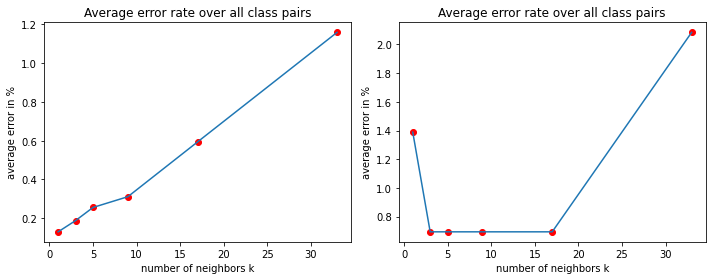

In [15]:
# Plot average error rate for each k
plot_error_rate(K, confusion)

Further reading: [Choice of Neighbor Order in Nearest-Neighbor Classification](https://arxiv.org/pdf/0810.5276.pdf)

In [16]:
oses = np.empty(len(K))
for i in range(len(K)):
    oses[i] = calculate_error_knn_classifier(X_train, X_test, y_train, y_test, k=K[i])

In [17]:
display(pd.DataFrame(data=oses, index=K, columns=['OSE'])
        .rename_axis('k', axis='columns'))

k,OSE
1,1.251739
3,1.529903
5,2.086231
9,2.642559
17,4.033380
33,5.424200


### Cross-Validation

In [18]:
X = np.vstack((X_train, X_test))
y = np.hstack((y_train, y_test))  

In [22]:
folds = [2, 5, 10]
stats = ['Mean', 'Std']

ose_stats = np.empty((len(folds), len(K), len(stats)))
sklearn_ose_stats = np.empty((len(folds), len(K), len(stats)))

for j, fold in enumerate(folds):
    for i, k in enumerate(K):
        kf = KFoldCV.KFoldCV(n_folds=fold, shuffle=True, seed=12345)
        sklearn_knn = KNeighborsClassifier(n_neighbors=k)
        
        error_rates = []
        sklearn_error_rates = []
        
        for train_index, test_index in kf.split(data_set=X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            batch_size = X_test.shape[0]
            
            # Run knn
            ose = calculate_error_knn_classifier(X_train, X_test, y_train, y_test, k=k)
            # Append OSE for a given number of folds, k-neighbors to in be included in the majority vote, and split 
            error_rates.append(ose)
                      
            # Run sklearn's knn
            sklearn_knn.fit(X_train, y_train)
            prediction = sklearn_knn.predict(X_test)
            sklearn_n_errors = np.count_nonzero(y_test != prediction)
            sklearn_ose = 100 * sklearn_n_errors / batch_size
            # Append OSE for a given number of folds, k-neighbors to in be included in the majority vote, and split 
            sklearn_error_rates.append(sklearn_ose)
            
        ose_stats[j, i, 0] = np.mean(error_rates)
        ose_stats[j, i, 1] = np.std(error_rates)
        sklearn_ose_stats[j, i, 0] = np.mean(sklearn_error_rates)
        sklearn_ose_stats[j, i, 1] = np.std(sklearn_error_rates)

In [23]:
# Display panda.DataFrame for a given k
k_idx = 0
stats = np.hstack((ose_stats[:, 0, :], sklearn_ose_stats[:, 0, :]))

In [24]:
display(pd.DataFrame(
    data=stats,
    index=["n = 2", "n = 5", "n = 10"],
    columns=['Error Rate Mean', 'Std', 'Error Rate Mean (sklearn)', 'Std (sklearn)']
)
    .style.format("{0:.3f} %")
)

,Error Rate Mean,Std,Error Rate Mean (sklearn),Std (sklearn)
n = 2,1.836 %,0.057 %,1.836 %,0.057 %
n = 5,1.113 %,0.585 %,1.113 %,0.585 %
n = 10,1.112 %,0.702 %,1.112 %,0.702 %


The training set grows in size as more folds are used. As a result, the error rate falls. However, by using more folds, we are able to test the models on a larger number of different (and smaller) test sets. As a result, the variance rises. 